# CS6650 (Web M.Tech): Smart Sensing for Internet of Things

#### Homework 2 (Part A) (Diwali 2024 Semester)

Submission Deadline : Nov 29th, 2024

---

Name: `Dipendu Ghosh`

Roll No: `CS23M509`

Email: `CS23M509@smail.iitm.ac.in`

---

### Android-based GNSS Measurements

<div style="display:flex; overflow: hidden;">
  <img src="./images/image6.png" width="400" height="250" style="margin:20px; object-fit: cover; object-position: top;">
  <div style="margin:20px;">
    <p>GNSS (Global Navigation Satellite System) today includes a variety of satellite constellations, including the GPS (American, global), GLONASS (Russian, global), BeiDou (Chinese, global), Galileo (European, global), NavIC (Indian, regional) and QZSS (Japanese, regional). Depending on your smartphone’s hardware capabilities, you can tap into signals from such constellations and update your location. Google provides an array of open-source <a href="https://github.com/google/gps-measurement-tools">tools</a> for performing GNSS-related measurements on commodity Android smartphones and analyzing such datasets.</p>
    <p>
    Download and install this app ( <a href="https://play.google.com/store/apps/details?id=com.google.android.apps.location.gps.gnsslogger&hl=en_IN&gl=US">GnssLogger App – Apps on Google Play</a>) to get started. Ensure the location permissions are provided to this app, and you have turned on your phone's location service (e.g., GPS). Turn on the "location" switch in the GNSSLogger app, as shown in the figure. Go to the next tab, "Log", and check whether you receive the GNSS specific diagnostic messages that include your location coordinates (latitude and longitude fix). <b>Make sure "Fused location" and "Network location" in the GNSS logger app are turned off before you start logging</b>. You can save the log data to a file and export this to the SD card or share it to your drive/email for offline use. Try playing with this app and make sure you are receiving the logs correctly. Cross-check the location coordinates reported by the app in Google maps.
    </p>
  </div>
</div>

---

Concentrate on the lines starting with keywords with “Fix” and `Status” (see GNSS Status [API](https://developer.android.com/reference/android/location/GnssStatus)). “Fix” related lines will provide you with the location coordinates of your phone. Only consider lines with “Fix, GPS” (raw GPS) and not “Fix, FLP” (fused location, uses IMU for correction). <a id='measurements'></a>

- **Sample fix line (we are interested only in the red highlighted part)**: Fix, Provider, <span style="color:red">LatitudeDegrees, LongitudeDegrees</span>, AltitudeMeters, SpeedMps, AccuracyMeters, BearingDegrees, UnixTimeMillis, SpeedAccuracyMps, BearingAccuracyDegrees, elapsedRealtimeNanos.

  Example: Fix, GPS, <span style="color:red">12.997769, 80.240794</span>, -100.513824, 0.000000, 5.360000, 0.000000, 1616658843000, 0.49396357, 0.0, 1742433115036168

- **Sample status line (we are interested only in the red highlighted part)**: Status, UnixTimeMillis, SignalCount, SignalIndex, <span style="color:red">ConstellationType, Svid</span>, CarrierFrequencyHz, <span style="color:red">Cn0DbHz, AzimuthDegrees, ElevationDegrees, UsedInFix</span>, HasAlmanacData, HasEphemerisData, BasebandCn0DbHz
  Example: Status, 1616658843000, 40, 38, <span style="color:red">6, 1</span>, 1575420032, <span style="color:red">15.00, 355.00, 37.00, 1</span>, 1, 0,

- **ConstellationType**: Only use GPS (for now, please ignore data from GLONASS, BeiDou etc., even if your phone supports it). Flag for GPS = 1, (see [this](https://developer.android.com/reference/android/location/GnssStatus#CONSTELLATION_GPS))
- **Svid**: Satellite ID
- **Cn0DbHz**: Signal Strength or SNR of the signal received from the particular satellite.
- **AzimuthDegrees (0 - 360) & Elevation Degrees (0 - 90)**: of the satellite ([Wiki](https://en.wikipedia.org/wiki/Azimuth))
- **UsedInFix**: Indicates whether this particular satellite was used for the latest fix for multilateration (remember, you need at least 4 of them?).

<div style="display:flex; flex-direction: column; align-items: center;">
        <figure style="margin: 20px; text-align: center; float: left;">
          <img src="./images/image3.png" width="600" height="400" >
          <figcaption>Fig. 1: Azimuth and Elevation</figcaption>
        </figure>
    </div>


### Tasks

First, create a directory following the `<Your_Roll>_CS6650H23` structure. Next, download this notebook and save it in the directory you created.

<div style="display:flex;">
  <img src="./images/image2.jpg" width="400" height="200" style="margin:20px;">
  <div style="margin:20px;">
    <p>Collect the <a href="#measurements">above</a> measurement logs at three distinct locations as indicated in the picture left.</p>
    <ol>
    <li>The smartphone is under the open sky a few meters from the entrance/door of your building.</li>
    <li> The smartphone is at the entrance (or some window) of your building, the sky is partially visible, and </li>
    <li> The smartphone is completely inside the building, very limited portion of the sky is visible maybe through the door/window.</li>
    </ol>
    <p>At each of these locations, collect GNSSLogger data for about 5 - 10 minutes (Perform the experiments on a sunny day with a clear sky). Now perform the following tasks.</p>
  </div>
</div>

1. [ ] [Attach sky photos of data collection locations (10 points)](#task1)
2. [ ] [Compute and plot location errors using haversine distance (15 points)](#task2)
3. [ ] [Analyze status entries before fix and their relation to error (45 points)](#task3)
4. [ ] [Show satellite statistics and SNR plots by azimuth and elevation (20 points)](#task4)
5. [ ] [Plot SNR by azimuth in angular space with satellite image (10 points)](#task5)

---

#### Guidelines for the Assignment

Before you start working on the assignment, please read the following instructions carefully:

- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $29^{th}$, Nov, 2024**

#### Submission Instructions

- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.

<div class="alert alert-block alert-success">
    <b>Tip</b>: Our recommendation to the students is to begin the assignment as soon as possible. If you have any doubts, please fill out the <a href="https://forms.gle/oMSkBsijAdWFS8rm7">Google Form</a> with the necessary information and the instructor will address all concerns in the next class.
</div>


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
import pandas as pd
from tabulate import tabulate


sns.set_theme()
cmap = sns.color_palette()

In [2]:
# Header map for Fix, including the field names and their corresponding indices
fix_header_map = {
    "Fix": 0,
    "Provider": 1,
    "LatitudeDegrees": 2,
    "LongitudeDegrees": 3,
    "AltitudeMeters": 4,
    "SpeedMps": 5,
    "AccuracyMeters": 6,
    "BearingDegrees": 7,
    "UnixTimeMillis": 8,
    "SpeedAccuracyMps": 9,
    "BearingAccuracyDegrees": 10,
    "elapsedRealtimeNanos": 11,
    "VerticalAccuracyMeters": 12,
    "MockLocation": 13,
    "NumberOfUsedSignals": 14,
    "VerticalSpeedAccuracyMps": 15,
    "SolutionType": 16,
}

filtered_fix_header_map = {
    "LatitudeDegrees": 0,
    "LongitudeDegrees": 1,
    "UnixTimeMillis": 2,
}

# Header map for Status, including the field names and their corresponding indices
status_header_map = {
    "Status": 0,
    "UnixTimeMillis": 1,
    "SignalCount": 2,
    "SignalIndex": 3,
    "ConstellationType": 4,
    "Svid": 5,
    "CarrierFrequencyHz": 6,
    "Cn0DbHz": 7,
    "AzimuthDegrees": 8,
    "ElevationDegrees": 9,
    "UsedInFix": 10,
    "HasAlmanacData": 11,
    "HasEphemerisData": 12,
    "BasebandCn0DbHz": 13,
}

filtered_status_header_map = {
    "UnixTimeMillis": 0,
    "ConstellationType": 1,
    "Svid": 2,
    "Cn0DbHz": 3,
    "AzimuthDegrees": 4,
    "ElevationDegrees": 5,
    "UsedInFix": 6,
}

# Example usage in the code when parsing each "Fix,GPS" line:
# You can now refer to the indices dynamically based on the header map.

# List of paths to your GNSS log files in different directories
# Number of unique Svids followed by the unique Svids when Sky View is Open 	 10 	 {2, 3, 4, 7, 8, 9, 17, 21, 22, 27}
# Number of unique Svids followed by the unique Svids when Sky View is Partial 	 10 	 {2, 3, 4, 8, 9, 14, 17, 21, 22, 27}
# Number of unique Svids followed by the unique Svids when Sky View is Limited 	 8 	 {2, 3, 4, 8, 14, 21, 22, 27}
# log_file_paths = [
#     "dipendu_data/j_logs/open.txt",
#     "dipendu_data/j_logs/partial.txt",
#     "dipendu_data/j_logs/no.txt"
# ]

# Number of unique Svids followed by the unique Svids when Sky View is Open 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Partial 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Limited 	 9 	 {3, 4, 7, 8, 9, 16, 21, 27, 31}
# log_file_paths = [
#     "dipendu_data/r_logs/open/gnss_log_open_sky.txt",
#     "dipendu_data/r_logs/partial/gnss_log_partial_sky.txt",
#     "dipendu_data/r_logs/limited/gnss_log_limited_sky.txt"
# ]

log_file_paths = [
    "dipendu_data/a_logs/RoofTop_day_9mins.txt",
    "dipendu_data/a_logs/Window_day_9mins.txt",
    "dipendu_data/a_logs/Inside_diningHall.txt"
]

# log_file_paths = [
#     "/home/dipendu/programs/mtech_2023/sem-3/ssiot/CS6650-Smart-Sensing-for-IoT/HW3-GNSS-data-analysis/NA19B001_CS6650H23/logs/gnss_log_2023_04_17_17_49_19.txt",
#     "/home/dipendu/programs/mtech_2023/sem-3/ssiot/CS6650-Smart-Sensing-for-IoT/HW3-GNSS-data-analysis/NA19B001_CS6650H23/logs/gnss_log_2023_04_23_14_44_44.txt",
#     "/home/dipendu/programs/mtech_2023/sem-3/ssiot/CS6650-Smart-Sensing-for-IoT/HW3-GNSS-data-analysis/NA19B001_CS6650H23/logs/gnss_log_2023_04_23_12_12_03.txt",
# ]

# Number of unique Svids followed by the unique Svids when Sky View is Open 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Partial 	 7 	 {3, 4, 9, 16, 26, 27, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Limited 	 8 	 {3, 4, 9, 16, 26, 27, 28, 31}
# log_file_paths = [
#     "dipendu_data/logs/1/1_sky_view_open/gnss_log_2024_11_10_14_01_07.txt",
#     "dipendu_data/logs/1/2_sky_view_partial/gnss_log_2024_11_10_13_43_00.txt",
#     "dipendu_data/logs/1/3_sky_view_limited/gnss_log_2024_11_10_13_14_52.txt"
# ]


# Number of unique Svids followed by the unique Svids when Sky View is Open 	 11 	 {32, 3, 4, 7, 8, 9, 16, 26, 27, 28, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Partial 	 6 	 {32, 3, 4, 16, 26, 28}
# Number of unique Svids followed by the unique Svids when Sky View is Limited 	 8 	 {32, 3, 4, 16, 21, 26, 28, 31}
# log_file_paths = [
#     "dipendu_data/logs/2/1_sky_view_open/gnss_log_2024_11_14_12_48_41.txt",
#     "dipendu_data/logs/2/2_sky_view_partial/gnss_log_2024_11_14_12_31_38.txt",
#     "dipendu_data/logs/2/3_sky_view_limited/gnss_log_2024_11_14_11_51_40.txt"
# ]


# Number of unique Svids followed by the unique Svids when Sky View is Open 	 10 	 {32, 2, 3, 10, 16, 21, 25, 26, 28, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Partial 	 8 	 {32, 10, 21, 23, 25, 26, 28, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Limited 	 7 	 {32, 10, 21, 23, 25, 28, 31}
# log_file_paths = [
#     "dipendu_data/logs/3/1_sky_view_open/gnss_log_2024_11_21_09_59_41.txt",
#     "dipendu_data/logs/3/2_sky_view_partial/gnss_log_2024_11_21_09_22_44.txt",
#     "dipendu_data/logs/3/3_sky_view_limited/gnss_log_2024_11_21_08_33_02.txt"
# ]

# Number of unique Svids followed by the unique Svids when Sky View is Open 	 10 	 {32, 2, 3, 10, 16, 21, 25, 26, 28, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Partial 	 7 	 {32, 10, 21, 25, 26, 28, 31}
# Number of unique Svids followed by the unique Svids when Sky View is Limited 	 8 	 {32, 10, 21, 23, 25, 26, 28, 31}
# log_file_paths = [
#     "dipendu_data/logs/4/1_sky_view_open/gnss_log_2024_11_21_10_11_07.txt",
#     "dipendu_data/logs/4/2_sky_view_partial/gnss_log_2024_11_21_09_33_45.txt",
#     "dipendu_data/logs/4/3_sky_view_limited/gnss_log_2024_11_21_09_05_55.txt",
# ]

# List of titles for each log file
titles = ["Open", "Partial", "Limited"]

# Lists to hold fix and status data for each log file
all_fix_data = []
all_status_data = []

# List to store the metadata for each log file
log_files_metadata = []

# Process each log file with corresponding title
for log_file_path, title in zip(log_file_paths, titles):
    # Get the directory of the current log file
    log_dir = os.path.dirname(log_file_path)

    # Define paths for the output files in the same directory as the current log file
    fix_file_path = os.path.join(log_dir, "fix.txt")
    status_file_path = os.path.join(log_dir, "status.txt")

    # Remove fix.txt and status.txt if they already exist
    if os.path.exists(fix_file_path):
        os.remove(fix_file_path)
    if os.path.exists(status_file_path):
        os.remove(status_file_path)

    fix_data = []  # List to hold fix data for this file
    status_data = []  # List to hold status data for this file

    # Open the current log file and the corresponding output files
    with open(log_file_path, "r") as log_file, open(
        fix_file_path, "w"
    ) as fix_file, open(status_file_path, "w") as status_file:

        # Iterate through each line in the log file
        for line in log_file:
            # Check if the line starts with "Fix,GPS," and write to fix.txt
            if line.startswith("Fix,GPS,"):
                # Split the line into fields
                fields = line.strip().split(",")

                # Extract LatitudeDegrees and LongitudeDegrees using the header map
                try:
                    latitude = float(fields[fix_header_map["LatitudeDegrees"]])
                    longitude = float(fields[fix_header_map["LongitudeDegrees"]])
                    unix_time_millis = int(fields[fix_header_map["UnixTimeMillis"]])

                    # Write the latitude and longitude to fix.txt
                    fix_file.write(f"{latitude},{longitude},{unix_time_millis}\n")
                    fix_data.append(
                        {
                            "LatitudeDegrees": latitude,
                            "LongitudeDegrees": longitude,
                            "UnixTimeMillis": unix_time_millis,
                        }
                    )
                except IndexError:
                    print(f"Error processing line (missing data): {line}")
            # Check if the line starts with "Status," and write to status.txt
            elif line.startswith("Status,"):
                # Split the line into fields
                fields = line.strip().split(",")

                # Extract the required fields using the header map
                try:
                    constellation_type = int(
                        fields[status_header_map["ConstellationType"]]
                    )
                    used_in_fix = int(fields[status_header_map["UsedInFix"]])

                    # Only copy the line to status.txt if ConstellationType is "1" and UsedInFix is "1"
                    if constellation_type == 1 and used_in_fix == 1:
                        unix_time_millis = fields[status_header_map["UnixTimeMillis"]]
                        if unix_time_millis == "":
                            unix_time_millis = np.iinfo(np.int64).min
                        else:
                            unix_time_millis = int(unix_time_millis)
                        svid = int(fields[status_header_map["Svid"]])
                        cn0_dbhz = float(fields[status_header_map["Cn0DbHz"]])
                        azimuth_degrees = float(
                            fields[status_header_map["AzimuthDegrees"]]
                        )
                        elevation_degrees = float(
                            fields[status_header_map["ElevationDegrees"]]
                        )

                        # Write the extracted data to status.txt
                        status_file.write(
                            f"{unix_time_millis},{constellation_type},{svid},{cn0_dbhz},{azimuth_degrees},{elevation_degrees},{used_in_fix}\n"
                        )
                        status_data.append(
                            {
                                "UnixTimeMillis": unix_time_millis,
                                "ConstellationType": constellation_type,
                                "Svid": svid,
                                "Cn0DbHz": cn0_dbhz,
                                "AzimuthDegrees": azimuth_degrees,
                                "ElevationDegrees": elevation_degrees,
                                "UsedInFix": used_in_fix,
                            }
                        )
                except IndexError:
                    print(f"Error processing status line (missing data): {line}")

    # Get unique Svids for the current fix
    unique_svids = {status["Svid"] for status in status_data}
    print(
        f"Number of unique Svids followed by the unique Svids when Sky View is {title} \t {len(unique_svids)} \t {unique_svids}"
    )

    # Add fix and status data to global lists
    all_fix_data.append(fix_data)
    all_status_data.append(status_data)

    # Create a metadata map for this log file
    log_metadata = {
        "title": title,
        "fix_log_file_path": fix_file_path,
        "status_log_file_path": status_file_path,
    }

    # Add the metadata to the list
    log_files_metadata.append(log_metadata)

    # print(f"Processed logs when Sky View is {title}.")


# Display the metadata for each log file
# for metadata in log_files_metadata:
#     print(metadata)

Number of unique Svids followed by the unique Svids when Sky View is Open 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}
Number of unique Svids followed by the unique Svids when Sky View is Partial 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}
Number of unique Svids followed by the unique Svids when Sky View is Limited 	 9 	 {3, 4, 7, 8, 9, 16, 26, 27, 31}


### Task 1: Attach sky photos of data collection locations [10 points] <a id='task1'></a>

Attach photos of the three locations with the phone, where data is collected, particularly the exposure to the sky.


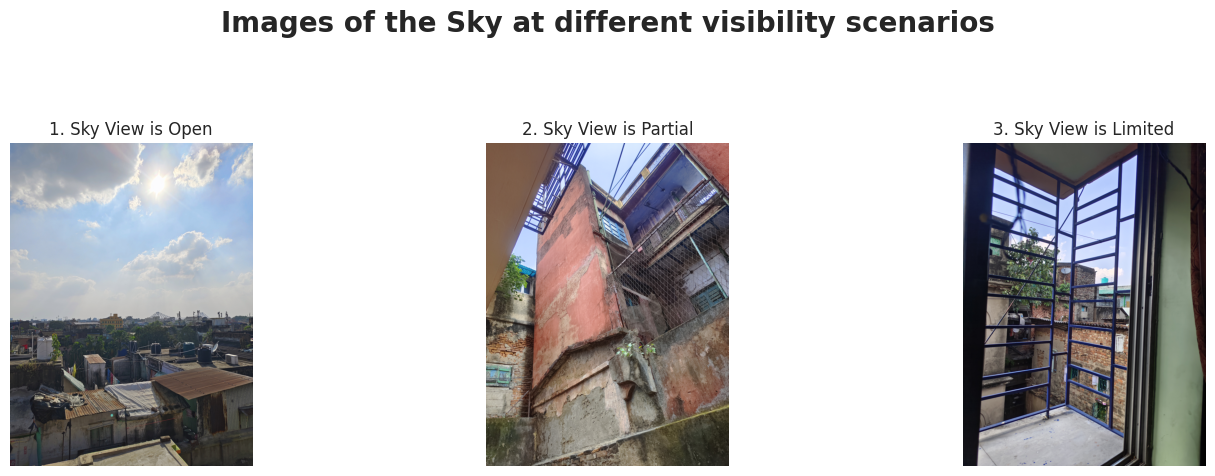

In [3]:
# List of image dictionaries with 'title' and 'path'
images = [
    {
        "title": "Open",
        "path": "dipendu_data/images/1_sky_view_open/IMG_20241110_141155.jpg",
    },
    {
        "title": "Partial",
        "path": "dipendu_data/images/2_sky_view_partial/IMG_20241110_135352.jpg",
    },
    {
        "title": "Limited",
        "path": "dipendu_data/images/3_sky_view_limited/IMG_20241110_132521.jpg",
    },
]

# Number of images
num_images = len(images)

# Set up the plot figure
plt.figure(figsize=(5 * num_images, 5))
plt.suptitle(
    "Images of the Sky at different visibility scenarios\n",
    fontsize=20,
    fontweight="bold",
)  # Main title for the entire subplot

# Loop through each image map and display it
for i, image_info in enumerate(images):
    # Load the image
    img = Image.open(image_info["path"])

    # Add a subplot for each image
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title(
        f"{i + 1}. Sky View is {image_info['title']}"
    )  # Subplot title with index and custom title

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit main title
plt.show()

##### Observations Task 1

Edit this section to put your observations.


### Task 2: Compute and plot location errors using haversine distance [15 points] <a id='task2'></a>

Calculate the mean location coordinates for all three locations. Assume those three locations as the `groundtruth`. Compute the error for each location fix sample, which is the distance between the location sample and the groundtruth location. You must use haversine distance ([Wiki](https://en.wikipedia.org/wiki/Haversine_formula)). Plot the CDF (cumulative distribution function) of these errors for the three locations. Comment on the variance of the three distributions.


Groundtruth (mean latitude and longitude for each instance):
[(22.494374176623378, 88.36873108918367), (22.494307870759258, 88.36872297066667), (22.494240532981483, 88.36879103551851)]
Errors when Sky View is Open:
[0.9170959919097387, 1.3104160335889483, 1.4552356014372236, 1.6850879172717337, 1.7498649010477154, 2.0649818935230364, 1.90931065488308, 1.652322457036992, 1.4392795974544, 1.2781674830989447, 1.2471846978414025, 0.9090793430016648, 0.5788737931420104, 0.47783456017969056, 0.4968629935425718, 0.3836844755188466, 0.33963534456771727, 0.5570806557271961, 0.3727595545095993, 0.4972761542302134, 0.5350898773367385, 0.7106506011161018, 0.6022370499841418, 0.8398277579294047, 0.6790646690727756, 0.6600316886137281, 0.7466136417766507, 0.6512087815669537, 0.833594817002622, 0.8149035223752742, 0.6072886387955324, 0.985099745747815, 1.0922337112667373, 0.9900547402203245, 1.3876847678974593, 1.253644368686616, 1.1110176251705046, 0.8748363633992684, 0.7326155279295403, 0.435653667

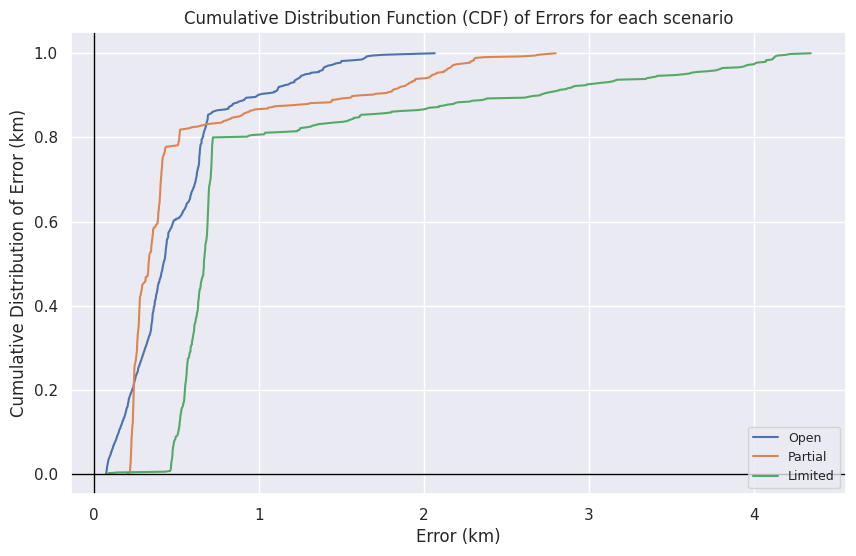

Variance of errors 0.12084812194999961
Variance of CDF 0.0833330464923362
Variance of errors 0.32387066157235417
Variance of CDF 0.08333304755372659
Variance of errors 0.8590476044928074
Variance of CDF 0.08333304755372659


In [4]:
# Earth radius in kilometers
radius_earth_km = 6371.0


# Function to calculate Haversine distance between two points
def haversineDistance(latitude1, longitude1, latitude2, longitude2):
    # Convert latitude and longitude from degrees to radians
    latitude1, longitude1, latitude2, longitude2 = map(
        math.radians, [latitude1, longitude1, latitude2, longitude2]
    )

    # Haversine formula
    dlat = latitude2 - latitude1
    dlon = longitude2 - longitude1
    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(latitude1) * math.cos(latitude2) * math.sin(dlon / 2) ** 2
    )
    central_angle = 2 * math.asin(math.sqrt(a))
    # from sklearn.metrics.pairwise import haversine_distances
    # central_angle = haversine_distances(np.array([[latitude1, longitude1]]),np.array([[latitude2, longitude2]]))

    distance_km = radius_earth_km * central_angle
    distance_m = distance_km * 1000
    return distance_m


# Initialize an empty list to store the mean latitude and longitude for each log file
groundtruth_per_scenario = []

# List to store the error distances for each log file
distance_errors_per_fix_per_scenario = []

# Process each log file's data in all_fix_data
for log_data, title in zip(all_fix_data, titles):
    # Extract latitudes and longitudes from the dictionaries
    latitudes = [entry["LatitudeDegrees"] for entry in log_data]
    longitudes = [entry["LongitudeDegrees"] for entry in log_data]

    # Calculate the mean latitude and longitude
    mean_latitude = sum(latitudes) / len(latitudes)
    mean_longitude = sum(longitudes) / len(longitudes)

    # print(f"Groundtruth for Sky View {title} is ({mean_latitude, mean_longitude})")
    # Append the mean values as a tuple to the groundtruth list
    groundtruth_per_scenario.append((mean_latitude, mean_longitude))

    # Array to store the error distances for this log file
    distance_error_per_fix = []

    # Calculate the Haversine distance from each point to the mean location
    for latitude, longitude in zip(latitudes, longitudes):
        harvesine_distance = haversineDistance(
            latitude, longitude, mean_latitude, mean_longitude
        )
        distance_error_per_fix.append(harvesine_distance)

    # Append the error distances array for this log file to the main list
    distance_errors_per_fix_per_scenario.append(distance_error_per_fix)

# Display the groundtruth list
print("Groundtruth (mean latitude and longitude for each instance):")
print(groundtruth_per_scenario)

# Display the errors for each log file
for errors, title in zip(distance_errors_per_fix_per_scenario, titles):
    print(f"Errors when Sky View is {title}:")
    print(errors)

variances = []
cdf_variances = []

# Plot cumulative distribution of errors for each log file
# plt.figure(figsize=(10, 6))
# for i, (errors, title) in enumerate(zip(distance_errors_per_fix_per_scenario, titles)):
#     # Sort errors and calculate cumulative sum for the CDF
#     sorted_errors = np.sort(errors)
#     # Uncomment the below line if inbuildt haversion distance is used
#     # sorted_errors = np.sort(errors, axis=0).ravel()
#     # new_sorted_errors = sorted_errors / np.sum(sorted_errors)
#     cumulative_distribution = np.cumsum(sorted_errors)/ np.sum(sorted_errors)

#     variance = np.var(errors)
#     variances.append(variance)

#     cdf_variance = np.var(cumulative_distribution)
#     cdf_variances.append(cdf_variance)

#     # Plot cumulative distribution
#     plt.plot(sorted_errors, cumulative_distribution, label=f'{title}', color=cmap[i])
#     # plt.text(1.4, 350-i*20, rf"$\sigma^2 = {cdf_variance}$", color=cmap[i])

# # Customize the plot
# plt.xlabel('Error (km)')
# plt.ylabel('Cumulative Distribution of Error (km)')
# plt.title('Cumulative Distribution Function (CDF) of Errors for each scenario')
# plt.legend(loc='lower right', fontsize=9)
# # Add black axis lines
# plt.axhline(y=0, color='black', linewidth=1)  # Horizontal axis line at y=0
# plt.axvline(x=0, color='black', linewidth=1)   # Vertical axis line at x=1 (start of fixes)
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 6))
for i, (errors, title) in enumerate(zip(distance_errors_per_fix_per_scenario, titles)):
    # Sort errors and calculate cumulative sum for the CDF
    sorted_errors = np.sort(errors)
    # Uncomment the below line if inbuildt haversion distance is used
    # sorted_errors = np.sort(errors, axis=0).ravel()
    sorted_errors_len = len(sorted_errors)
    cumulative_distribution = np.arange(1, sorted_errors_len + 1) / sorted_errors_len

    variance = np.var(sorted_errors)
    variances.append(variance)

    cdf_variance = np.var(cumulative_distribution)
    cdf_variances.append(cdf_variance)

    # Plot cumulative distribution
    plt.plot(sorted_errors, cumulative_distribution, label=f"{title}", color=cmap[i])
    # plt.text(1.4, 350-i*20, rf"$\sigma^2 = {cdf_variance}$", color=cmap[i])

# Customize the plot
plt.xlabel("Error (km)")
plt.ylabel("Cumulative Distribution of Error (km)")
plt.title("Cumulative Distribution Function (CDF) of Errors for each scenario")
plt.legend(loc="lower right", fontsize=9)
# Add black axis lines
plt.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
plt.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)
plt.grid(True)
plt.show()


# Print variances for each log file
for variance, cdf_variance in zip(variances, cdf_variances):
    print(f"Variance of errors {variance}\nVariance of CDF {cdf_variance}")

##### Observations Task 2

Edit this section to put your observations.


### Task 3: Analyze status entries before fix and their relation to error [45 points] <a id='task3'></a>

Check the `status` entries prior to receiving a `fix`.

1. How many satellites were used for the fix (check the UsedInFix entry for the satellites) for the three locations? (state the median # of satellites)
2. How does the distance error for a fix correlate to the number of satellites used for that fix? Show scatter plots for the three locations. Summarize your observations.
3. How does the distance error for a fix correlate to the average SNR (Cn0DbHz entry) of the satellites that were used in the fix? Show scatter plots for the three locations. Summarize your observations.


Unique SVID count per Scenario: [[0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

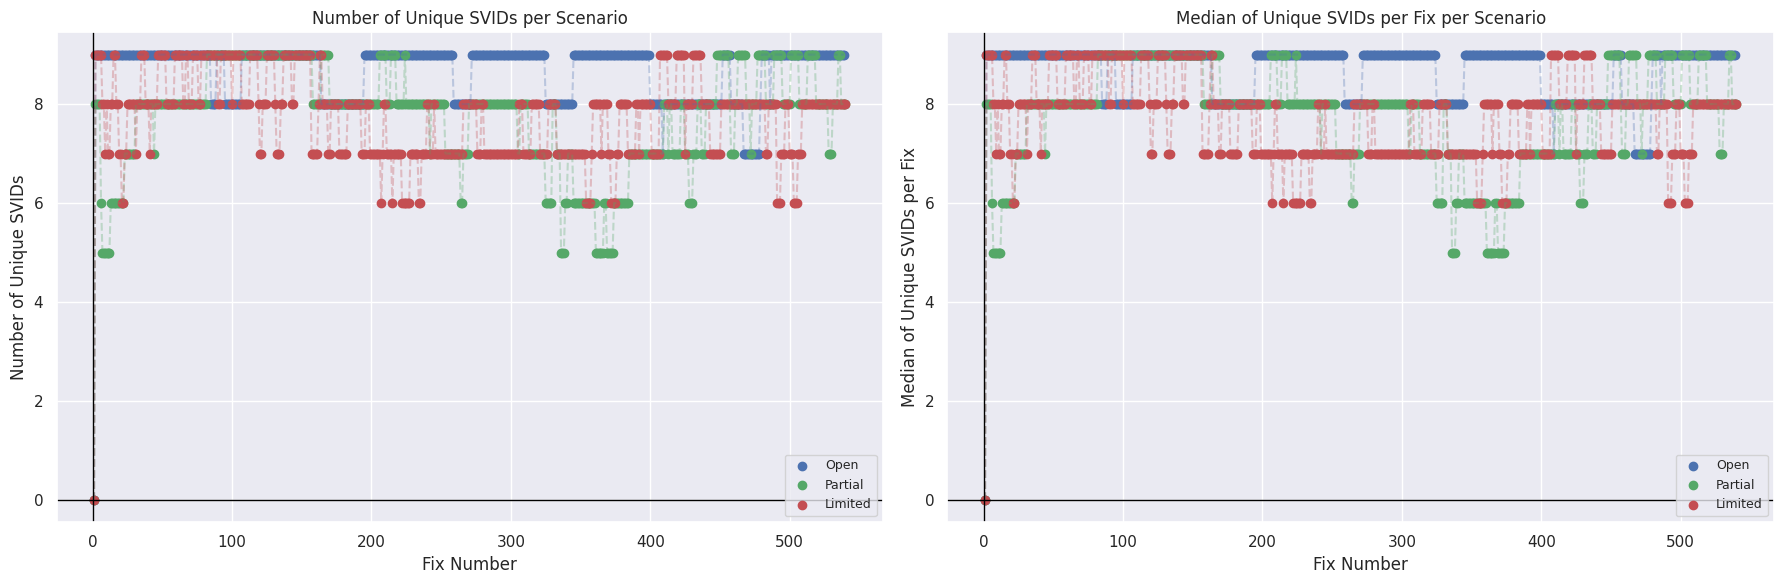

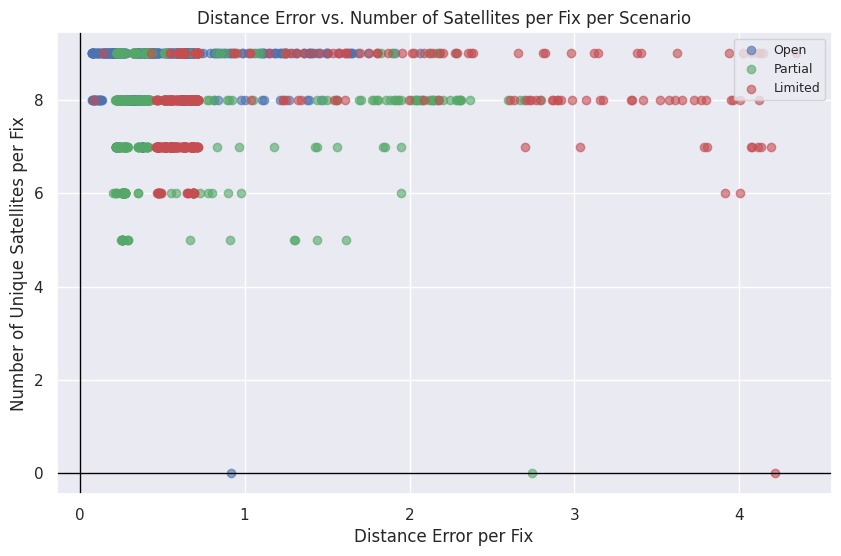

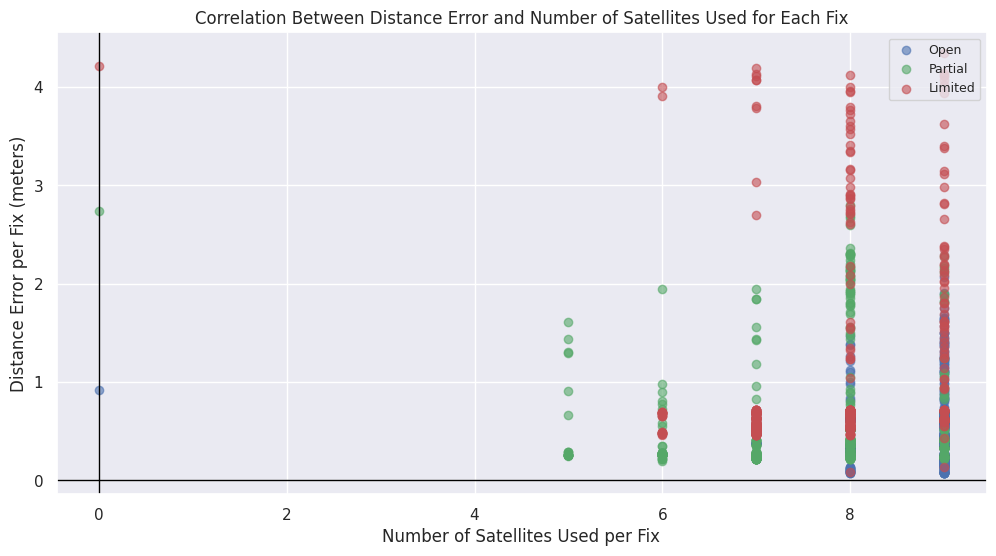

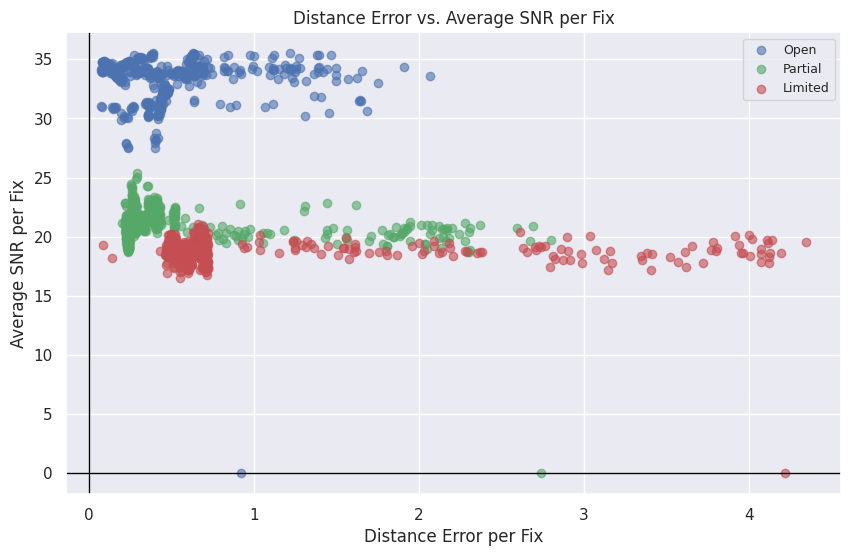

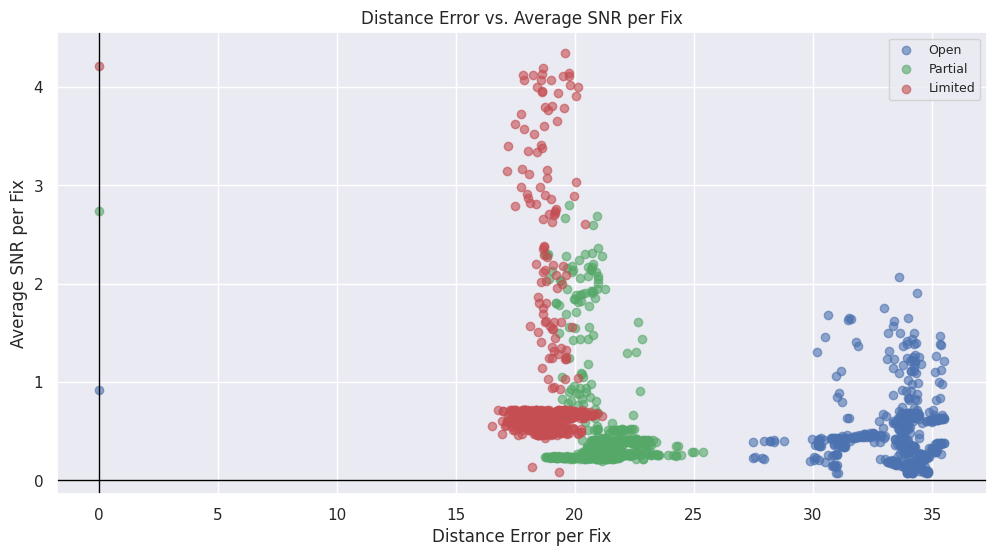

In [5]:
# Initialize lists to hold results
unique_svid_count_per_fix_per_scenario = []
median_satellites_per_fix_per_scenario = []
average_cn0dbhz_per_fix_per_scenario = []
median_satellites_per_scenario = []

# Process each set of data (1 set per log file)
for fix_data, status_data in zip(all_fix_data, all_status_data):
    unique_svid_counts = (
        []
    )  # List to store the count of unique Svids per fix in this log file
    median_satellites_per_fix = []  # List to store the median of unique Svids per fix
    average_cn0bdhz_per_fix = []  # List to store the average Cn0DbHz per fix

    # Initialize the starting min timestamp
    min_timestamp = 0

    # Loop through each fix in the current log file's fix_data
    for fix in fix_data:
        max_timestamp = fix["UnixTimeMillis"]

        # Filter status entries within the current time range and where UsedInFix == 1
        status_in_range = [
            status
            for status in status_data
            if min_timestamp <= status["UnixTimeMillis"] < max_timestamp
            and status["UsedInFix"] == 1
        ]

        # Get unique Svids for the current fix
        unique_svids = {status["Svid"] for status in status_in_range}
        unique_svid_count = len(unique_svids)
        unique_svid_counts.append(unique_svid_count)  # Store the count of unique Svids

        # Calculate and store the median number of satellites for this fix
        median_satellites_per_fix.append(median([unique_svid_count]))

        # Calculate the average Cn0DbHz for this fix
        cn0dbhz_values = [
            status["Cn0DbHz"] for status in status_in_range if "Cn0DbHz" in status
        ]
        if cn0dbhz_values:  # If there are any Cn0DbHz values
            avg_cn0 = sum(cn0dbhz_values) / len(cn0dbhz_values)
        else:
            avg_cn0 = 0  # Set to 0 or NaN if no valid Cn0DbHz values

        average_cn0bdhz_per_fix.append(avg_cn0)

        # Update min_timestamp for the next iteration
        min_timestamp = max_timestamp

    # Store the results for this log file
    unique_svid_count_per_fix_per_scenario.append(unique_svid_counts)
    median_satellites_per_fix_per_scenario.append(median_satellites_per_fix)
    average_cn0dbhz_per_fix_per_scenario.append(
        average_cn0bdhz_per_fix
    )  # Store the average Cn0DbHz per fix
    median_satellites_per_scenario.append(median(unique_svid_counts))

# Display results
print("Unique SVID count per Scenario:", unique_svid_count_per_fix_per_scenario)
print(
    "Median number of satellites per Fix per Scenario:",
    median_satellites_per_fix_per_scenario,
)
print("Average Cn0DbHz per Fix per Scenario:", average_cn0dbhz_per_fix_per_scenario)
print("Median number of satellites per Scenario:", median_satellites_per_scenario)

# # Define colors for each log file
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Extend this if you have more than 7 log files

# plt.figure(figsize=(10, 6))

# # Plot unique SVID counts for each log file on the same plot
# for idx, (unique_svid_counts, title) in enumerate(zip(unique_svid_count_per_logfile, titles)):
#     fix_numbers = list(range(1, len(unique_svid_counts) + 1))  # X-axis: Fix numbers
#     color = colors[idx % len(colors)]  # Cycle through colors if more log files than colors

#     # Scatter plot for each log file
#     plt.scatter(fix_numbers, unique_svid_counts, color=color, label=f'{title}')
#     plt.plot(fix_numbers, unique_svid_counts, linestyle='--', color=color, alpha=0.5)  # Optional: Connect points

# # Labels, title, and legend
# plt.xlabel("Fix Number")
# plt.ylabel("Number of Unique SVIDs")
# plt.title("Number of Unique SVIDs per Scenario")
# plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=9)
# # Add black axis lines
# plt.axhline(y=0, color='black', linewidth=1)  # Horizontal axis line at y=0
# plt.axvline(x=0, color='black', linewidth=1)   # Vertical axis line at x=1 (start of fixes)
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(10, 6))

# # Plot unique SVID counts for each log file on the same plot
# for idx, (unique_svid_counts, title) in enumerate(zip(median_satellites_per_fix_per_logfile, titles)):
#     fix_numbers = list(range(1, len(unique_svid_counts) + 1))  # X-axis: Fix numbers
#     color = colors[idx % len(colors)]  # Cycle through colors if more log files than colors

#     # Scatter plot for each log file
#     plt.scatter(fix_numbers, unique_svid_counts, color=color, label=f'{title}')
#     plt.plot(fix_numbers, unique_svid_counts, linestyle='--', color=color, alpha=0.5)  # Optional: Connect points

# # Labels, title, and legend
# plt.xlabel("Fix Number")
# plt.ylabel("Number of Unique SVIDs")
# plt.title("Number of Unique SVIDs per Scenario")
# plt.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=9)
# # Add black axis lines
# plt.axhline(y=0, color='black', linewidth=1)  # Horizontal axis line at y=0
# plt.axvline(x=0, color='black', linewidth=1)   # Vertical axis line at x=1 (start of fixes)
# plt.grid(True)
# plt.show()

# import matplotlib.pyplot as plt

# Define colors for each log file
colors = [
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
]  # Extend this if you have more than 7 log files

# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for unique SVID counts per scenario
for idx, (unique_svid_counts, title) in enumerate(
    zip(unique_svid_count_per_fix_per_scenario, titles)
):
    fix_numbers = list(range(1, len(unique_svid_counts) + 1))  # X-axis: Fix numbers
    color = colors[
        idx % len(colors)
    ]  # Cycle through colors if more log files than colors

    # Scatter plot for each log file in the first subplot
    ax1.scatter(fix_numbers, unique_svid_counts, color=color, label=f"{title}")
    ax1.plot(fix_numbers, unique_svid_counts, linestyle="--", color=color, alpha=0.3)

# Customize first subplot
ax1.set_xlabel("Fix Number")
ax1.set_ylabel("Number of Unique SVIDs")
ax1.set_title("Number of Unique SVIDs per Scenario")
ax1.legend(loc="lower right", fontsize=9)
ax1.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
ax1.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)
ax1.grid(True)

# Plot for median satellites per fix per scenario
for idx, (median_counts, title) in enumerate(
    zip(median_satellites_per_fix_per_scenario, titles)
):
    fix_numbers = list(range(1, len(median_counts) + 1))  # X-axis: Fix numbers
    color = colors[
        idx % len(colors)
    ]  # Cycle through colors if more log files than colors

    # Scatter plot for each log file in the second subplot
    ax2.scatter(fix_numbers, median_counts, color=color, label=f"{title}")
    ax2.plot(fix_numbers, median_counts, linestyle="--", color=color, alpha=0.3)

# Customize second subplot
ax2.set_xlabel("Fix Number")
ax2.set_ylabel("Median of Unique SVIDs per Fix")
ax2.set_title("Median of Unique SVIDs per Fix per Scenario")
ax2.legend(loc="lower right", fontsize=9)
ax2.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
ax2.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)
ax2.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Colors for each scenario
colors = ["b", "g", "r"]  # Adjust colors for different scenarios

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each scenario
for idx, (errors, svid_counts, title) in enumerate(
    zip(
        distance_errors_per_fix_per_scenario,
        unique_svid_count_per_fix_per_scenario,
        titles,
    )
):
    color = colors[idx % len(colors)]  # Assign color for each scenario

    # Scatter plot for errors vs. unique SVID counts
    plt.scatter(errors, svid_counts, color=color, label=f"{title}", alpha=0.6)

# Labels and title
plt.xlabel("Distance Error per Fix")
plt.ylabel("Number of Unique Satellites per Fix")
plt.title("Distance Error vs. Number of Satellites per Fix per Scenario")

# Add legend
plt.legend(loc="upper right", fontsize=9)
plt.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
plt.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)

# Add grid and display plot
plt.grid(True)
plt.show()

# Colors for each scenario (location)
colors = ["b", "g", "r"]  # Adjust colors for different scenarios

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Loop through each scenario (location)
for idx, (errors, svid_counts, title) in enumerate(
    zip(
        distance_errors_per_fix_per_scenario,
        unique_svid_count_per_fix_per_scenario,
        titles,
    )
):
    color = colors[idx % len(colors)]  # Assign a color for each scenario

    # Scatter plot: Distance error vs. Unique SVID count (number of satellites used for that fix)
    plt.scatter(svid_counts, errors, color=color, label=f"{title}", alpha=0.6)

# Labels and title for the plot
plt.xlabel("Number of Satellites Used per Fix")
plt.ylabel("Distance Error per Fix (meters)")
plt.title(
    "Correlation Between Distance Error and Number of Satellites Used for Each Fix"
)

# Add legend to the plot
plt.legend(loc="upper right", fontsize=9)
plt.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
plt.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)

# Add grid for easier visualization of data
plt.grid(True)

# Show the plot
plt.show()


# Colors for each scenario
colors = ["b", "g", "r"]  # Adjust colors for different scenarios

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each scenario
for idx, (errors, svid_counts, title) in enumerate(
    zip(
        distance_errors_per_fix_per_scenario,
        average_cn0dbhz_per_fix_per_scenario,
        titles,
    )
):
    color = colors[idx % len(colors)]  # Assign color for each scenario

    # Scatter plot for errors vs. unique SVID counts
    plt.scatter(errors, svid_counts, color=color, label=f"{title}", alpha=0.6)

# Labels and title
plt.xlabel("Distance Error per Fix")
plt.ylabel("Average SNR per Fix")
plt.title("Distance Error vs. Average SNR per Fix")

# Add legend
plt.legend(loc="upper right", fontsize=9)
plt.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
plt.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)

# Add grid and display plot
plt.grid(True)
plt.show()

# Colors for each scenario (location)
colors = ["b", "g", "r"]  # Adjust colors for different scenarios

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Loop through each scenario (location)
for idx, (errors, svid_counts, title) in enumerate(
    zip(
        distance_errors_per_fix_per_scenario,
        average_cn0dbhz_per_fix_per_scenario,
        titles,
    )
):
    color = colors[idx % len(colors)]  # Assign a color for each scenario

    # Scatter plot: Distance error vs. Unique SVID count (number of satellites used for that fix)
    plt.scatter(svid_counts, errors, color=color, label=f"{title}", alpha=0.6)

# Labels and title for the plot
plt.xlabel("Distance Error per Fix")
plt.ylabel("Average SNR per Fix")
plt.title("Distance Error vs. Average SNR per Fix")

# Add legend to the plot
plt.legend(loc="upper right", fontsize=9)
plt.axhline(y=0, color="black", linewidth=1)  # Horizontal axis line at y=0
plt.axvline(
    x=0, color="black", linewidth=1
)  # Vertical axis line at x=1 (start of fixes)

# Add grid for easier visualization of data
plt.grid(True)

# Show the plot
plt.show()

##### Observations Task 3

Edit this section to put your observations.


### Task 4: Show satellite statistics and SNR plots by azimuth and elevation [20 points] <a id='task4'></a>

Only consider the `status` instances where a particular satellite was used for a location fix.

1. Show a table for the `Svid`, `Average Azimuth`, `Average Elevation`, `Average SNR` (each row for a specific satellite).
1. Plot `Average Azimuth` (0 - 360 degrees) with `Average SNR` (see Note)
1. Plot `Average Elevation` (0, 90 degrees) with `Average SNR`


<div class="alert alert-block alert-info">
    <div style="display:flex; margin:20px;">
        <img src="./images/image1.jpg" width="300" height="200" >
        <div style="margin:20px;">
            <h2> How to calculate the azimuth corresponding to the direction of the window or door?</h2>
            <p>Take the two points (Lat1, Lon1) and (Lat2, Lon2) and use <a href="https://www.fcc.gov/media/radio/distance-and-azimuths">this website</a>, or any other online azimuth calculator. Basically, the azimuth gives you the angle the black line makes with 0 degrees north.
            </p>
        </div>
    </div>
</div>


Scenario : Sky is Open
+--------+-------------------+---------------------+---------------+
|   Svid |   Average Azimuth |   Average Elevation |   Average SNR |
+========+===================+=====================+===============+
|      3 |          217.398  |             34.5352 |       38.65   |
+--------+-------------------+---------------------+---------------+
|      4 |          342.137  |             67.0333 |       37.2376 |
+--------+-------------------+---------------------+---------------+
|      7 |          295.585  |             17.3444 |       35.8954 |
+--------+-------------------+---------------------+---------------+
|      8 |          159.311  |             39.6019 |       38.0137 |
+--------+-------------------+---------------------+---------------+
|      9 |          323      |             37.0333 |       32.2065 |
+--------+-------------------+---------------------+---------------+
|     16 |           28.3444 |             47.3981 |       37.7119 |
+--------+-

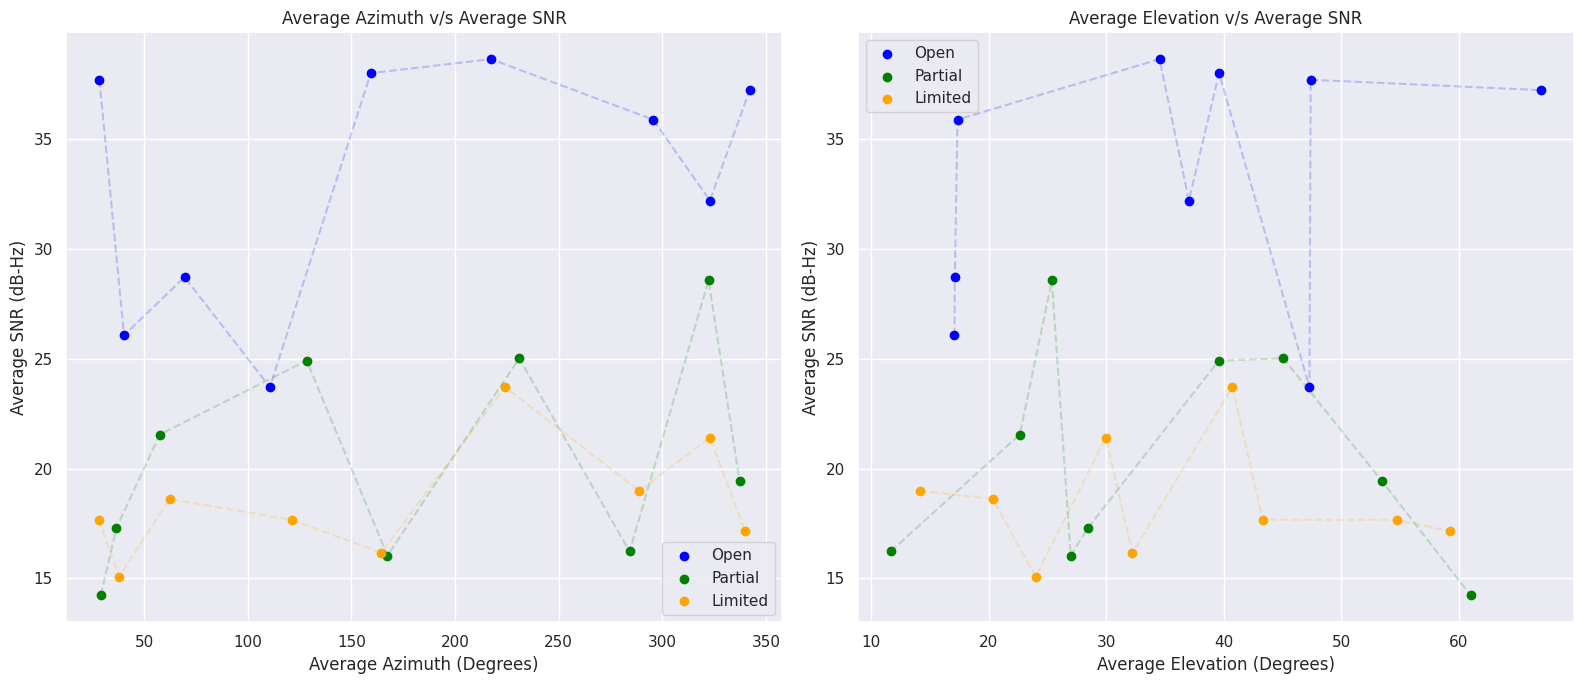

Point 1: Latitude = 22.4943079, Longitude = 88.3687230
Point 2: Latitude = 22.4943742, Longitude = 88.3687311


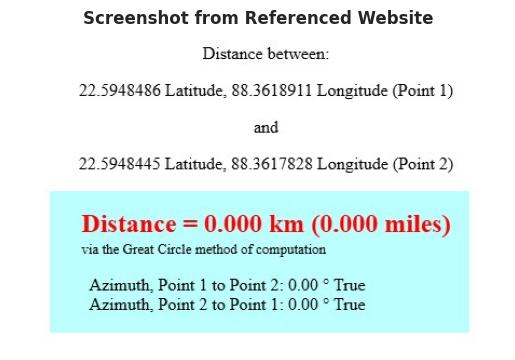

In [6]:
# Initialize a list to hold average data for each status_data
averaged_status_data_per_satellite_per_scenario = []

# Loop through each status_data in all_status_data
for status_data in all_status_data:
    # Dictionary to accumulate values for each Svid within the current status_data
    svid_data = {}

    # Loop through each status entry within the current status_data
    for status in status_data:
        svid = status["Svid"]

        # Initialize entry for this Svid if it does not exist
        if svid not in svid_data:
            svid_data[svid] = {
                "Cn0DbHz": [],
                "AzimuthDegrees": [],
                "ElevationDegrees": [],
            }

        # Append values for each attribute
        svid_data[svid]["Cn0DbHz"].append(status["Cn0DbHz"])
        svid_data[svid]["AzimuthDegrees"].append(status["AzimuthDegrees"])
        svid_data[svid]["ElevationDegrees"].append(status["ElevationDegrees"])

    # Calculate averages for each Svid in this status_data, store in a dictionary, and sort by Svid
    svid_averages = {}
    for svid in sorted(svid_data):
        values = svid_data[svid]
        svid_averages[svid] = {
            "AvgCn0DbHz": math.fsum(values["Cn0DbHz"]) / len(values["Cn0DbHz"]),
            "AvgAzimuthDegrees": math.fsum(values["AzimuthDegrees"])
            / len(values["AzimuthDegrees"]),
            "AvgElevationDegrees": math.fsum(values["ElevationDegrees"])
            / len(values["ElevationDegrees"]),
        }

    # Append the sorted average data for this status_data to the final results list
    averaged_status_data_per_satellite_per_scenario.append(svid_averages)

# # Display the averaged data for each status_data in all_status_data
# for i, avg_data in enumerate(averaged_status_data_per_satellite_per_scenario, start=1):
#     print(f"Averages for status_data {i}:")
#     for svid, averages in avg_data.items():
#         print(f"  Svid {svid}: {averages}")

# Initialize a list to store DataFrames for each status_data
status_tables_per_scenario = []

# Process each set of averaged status data for each scenario
for i, avg_data in enumerate(averaged_status_data_per_satellite_per_scenario):
    # Prepare data for the DataFrame
    table_data = {
        "Svid": [],
        "Average Azimuth": [],
        "Average Elevation": [],
        "Average SNR": [],
    }

    # Fill the table data from the sorted averaged Svid data
    for svid, averages in avg_data.items():
        table_data["Svid"].append(svid)
        table_data["Average Azimuth"].append(averages["AvgAzimuthDegrees"])
        table_data["Average Elevation"].append(averages["AvgElevationDegrees"])
        table_data["Average SNR"].append(averages["AvgCn0DbHz"])

    # Create a DataFrame from the table data
    df = pd.DataFrame(table_data)

    # Sort the DataFrame by Svid
    df.sort_values("Svid", inplace=True)

    # Append to the list of tables
    status_tables_per_scenario.append(df)

# Display the tables with borders
for i, (df, title) in enumerate(zip(status_tables_per_scenario, titles), start=1):
    print(f"Scenario : Sky is {title}")
    print(
        tabulate(df, headers="keys", tablefmt="grid", showindex=False)
    )  # Use grid format for borders
    print("\n")

# Define colors for each dataset
colors = ["blue", "green", "orange"]

# # Create a single figure
# plt.figure(figsize=(10, 7))

# # Loop through each table (one for each log file's status data)
# for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
#     # Sort the data by "Average Azimuth" for left-to-right plotting
#     sorted_df = df.sort_values(by="Average Azimuth")

#     # Scatter plot for each log file's data
#     plt.scatter(sorted_df["Average Azimuth"], sorted_df["Average SNR"], color=color, label=f'{title}', alpha=1)

#     # Line plot to connect the points in sorted order
#     plt.plot(sorted_df["Average Azimuth"], sorted_df["Average SNR"], color=color, linestyle='--', alpha=0.2)

# # Add plot details
# plt.xlabel("Average Azimuth (Degrees)")
# plt.ylabel("Average SNR (dB-Hz)")
# plt.title("Average Azimuth v/s Average SNR")
# plt.legend()
# plt.grid(True)

# # Show the combined plot with lines connecting points in sorted order
# plt.show()

# # Create a single figure
# plt.figure(figsize=(10, 7))

# # Loop through each table (one for each log file's status data)
# for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
#     # Sort the data by "Average Elevation" for left-to-right plotting
#     sorted_df = df.sort_values(by="Average Elevation")

#     # Scatter plot for each log file's data
#     plt.scatter(sorted_df["Average Elevation"], sorted_df["Average SNR"], color=color, label=f'{title}', alpha=1)

#     # Line plot to connect the points in sorted order
#     plt.plot(sorted_df["Average Elevation"], sorted_df["Average SNR"], color=color, linestyle='--', alpha=0.2)

# # Add plot details
# plt.xlabel("Average Elevation (Degrees)")
# plt.ylabel("Average SNR (dB-Hz)")
# plt.title("Average Elevation v/s Average SNR")
# plt.legend()
# plt.grid(True)

# # Show the combined plot with lines connecting points in sorted order
# plt.show()

# Create a 1x2 grid for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot Average Azimuth vs Average SNR on the first subplot
for i, (df, color, title) in enumerate(
    zip(status_tables_per_scenario, colors, titles), start=1
):
    sorted_df = df.sort_values(by="Average Azimuth")

    # Scatter plot and line plot for each log file's data
    axes[0].scatter(
        sorted_df["Average Azimuth"],
        sorted_df["Average SNR"],
        color=color,
        label=f"{title}",
        alpha=1,
    )
    axes[0].plot(
        sorted_df["Average Azimuth"],
        sorted_df["Average SNR"],
        color=color,
        linestyle="--",
        alpha=0.2,
    )

# Customize the first subplot
axes[0].set_xlabel("Average Azimuth (Degrees)")
axes[0].set_ylabel("Average SNR (dB-Hz)")
axes[0].set_title("Average Azimuth v/s Average SNR")
axes[0].legend()
axes[0].grid(True)

# Plot Average Elevation vs Average SNR on the second subplot
for i, (df, color, title) in enumerate(
    zip(status_tables_per_scenario, colors, titles), start=1
):
    sorted_df = df.sort_values(by="Average Elevation")

    # Scatter plot and line plot for each log file's data
    axes[1].scatter(
        sorted_df["Average Elevation"],
        sorted_df["Average SNR"],
        color=color,
        label=f"{title}",
        alpha=1,
    )
    axes[1].plot(
        sorted_df["Average Elevation"],
        sorted_df["Average SNR"],
        color=color,
        linestyle="--",
        alpha=0.2,
    )

# Customize the second subplot
axes[1].set_xlabel("Average Elevation (Degrees)")
axes[1].set_ylabel("Average SNR (dB-Hz)")
axes[1].set_title("Average Elevation v/s Average SNR")
axes[1].legend()
axes[1].grid(True)

# Display the side-by-side plots
plt.tight_layout()
plt.show()

# Extract and print the first and second points
point_1 = groundtruth_per_scenario[1]
point_2 = groundtruth_per_scenario[0]

print(f"Point 1: Latitude = {point_1[0]:.7f}, Longitude = {point_1[1]:.7f}")
print(f"Point 2: Latitude = {point_2[0]:.7f}, Longitude = {point_2[1]:.7f}")

plt.figure()
img = Image.open("dipendu_data/images/azimuth_calculation/azimuth_calculation.jpg")
plt.imshow(img)
plt.title("Screenshot from Referenced Website", fontweight="bold")
plt.axis(False)
plt.show()

##### Observations Task 4

Edit this section to put your observations.


### Task 5: Plot SNR by azimuth in angular space with satellite image [10 points] <a id='task5'></a>

<!-- <div style="display: flex; justify-content: center;">
        <img src="./images/image4.jpg" width="300" height="300">
        <img src="./images/image5.png" width="400" height="300">
    <p style="float: right; margin-left: 10px;">
        See the figures to the left. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.
    </p>
</div> -->

<div style="display: block; justify-content: center; align-items: center; margin: 20px">
  <div style="display: flex; justify-content: center; align-items: center;">
    <img src="./images/image4.jpg" width="300" height="300">
    <img src="./images/image5.png" width="400" height="300">
  </div>
  <p style="margin-left: 10px;">See the figures above. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.</p>
</div>


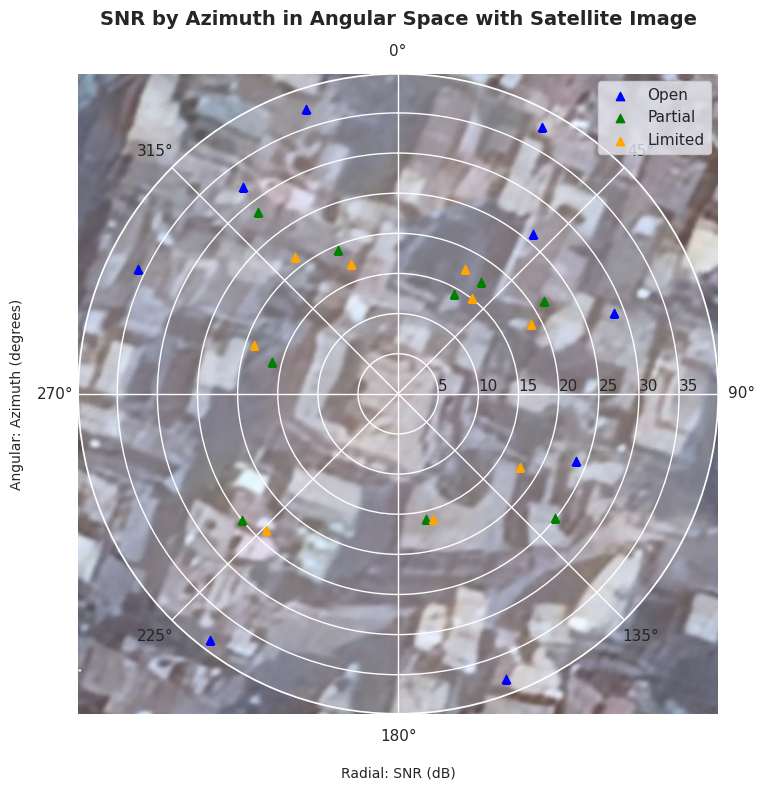

In [7]:
# Example of status_tables_per_scenario
# Assuming each df in status_tables_per_scenario contains "Average Azimuth" and "Average SNR" columns
# status_tables_per_scenario = [df1, df2, df3]  # Replace with your actual DataFrames

# Set up the figure
plt.figure(figsize=(8, 8))
fig = plt.gcf()

# Define the position and size of the axes
axes_coords = [0.1, 0.1, 0.8, 0.8]

# Add the image background
ax_image = fig.add_axes(axes_coords)
ax_image.imshow(
    Image.open("dipendu_data/images/azimuth_calculation/my_location.jpg"),
    alpha=0.7,
    aspect="auto",
)
ax_image.axis("off")  # Hide axes for the image

# Add a polar subplot for plotting the data
ax_polar = fig.add_axes(axes_coords, projection="polar")
ax_polar.patch.set_alpha(0.2)  # Make the polar plot background transparent
ax_polar.set_theta_direction(-1)  # Reverse the direction of the azimuth (clockwise)
# Set the 0-degree line to be at the top of the plot (90 degrees or π/2 radians)
ax_polar.set_theta_offset(np.pi / 2)  # 90 degrees = π/2 radians
ax_polar.set_rlabel_position(90)  # Set radial labels near 90 degrees

# Loop through each scenario (each table)
for i, (df, color, title) in enumerate(
    zip(status_tables_per_scenario, colors, titles), start=1
):
    # Convert "Average Azimuth" to theta (angle in radians)
    theta = np.radians(df["Average Azimuth"])  # Convert azimuth to radians for plotting
    r = df["Average SNR"]  # Use SNR directly as the radius

    # Plot the data points on the polar plot
    ax_polar.scatter(theta, r, color=color, marker="^", label=f"{title}")
    ax_polar.grid(True)

    # Optionally, you can add a line plot to connect points
    # ax_polar.plot(theta, r, color=color, linestyle='--', alpha=0.5)

# Add plot details
ax_polar.set_xlabel("\nRadial: SNR (dB)", fontsize=10)
ax_polar.set_ylabel("Angular: Azimuth (degrees)\n\n\n", fontsize=10)
plt.suptitle(
    "SNR by Azimuth in Angular Space with Satellite Image",
    fontweight="bold",
    fontsize=14,
)
plt.legend()

# Show the plot with the background image and concentric rings at specified radii
plt.show()

##### Observations Task 5

Edit this section to put your observations.
